In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.lines import Line2D
import numpy as np

In [9]:
def animate_patch_history(data, name):
    """
    Used for visualization and debugging. Takes a history dictionary and outputs a video
    for each timestep at each site in the history.
    """
    fig, ax = plt.subplots(dpi=100, facecolor=(1,1,1))
    ax.set_axis_off()
    images = []
    init_date = list(data.keys())[0]
    for site_name in data[init_date]:
        for date in data.keys():
            ax.set_title(name)
            hyperpatch = data[date][site_name]
            rgb = np.stack((hyperpatch['B4'], hyperpatch['B3'], hyperpatch['B2']), axis=-1)
            if len(rgb) > 0:
                im = plt.imshow(np.clip(rgb / 2000, 0, 1), animated=True)
                images.append([im])
    fig.tight_layout()
    ani = animation.ArtistAnimation(fig, images, interval=100, blit=True, repeat_delay=500)
    ani.save(os.path.join('..', 'figures', 'videos', name + '.mp4'))

In [12]:
fn = 'positive_raw_toa_36_2018-01-01.pkl'
with open('../../data/training_data/patch_histories/' + fn, 'rb') as f:
    patch_history = pickle.load(f)

[]


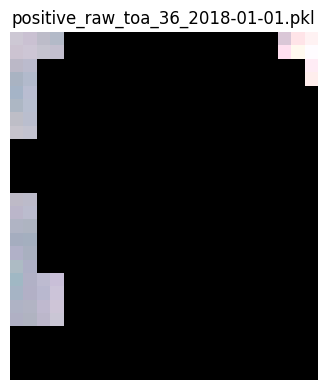

In [13]:
animate_patch_history(patch_history, fn)